In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report

%matplotlib inline

In [119]:
data=pd.read_csv('pseudo_facebook.csv')

In [120]:
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


- fill missing values

In [122]:
data['gender']=data['gender'].fillna('not provided')
data['tenure']=data['tenure'].ffill()

In [123]:
data.gender[data.gender == 'male'] = 0
data.gender[data.gender == 'female'] = 1
data.gender[data.gender == 'not provided'] = -1

In [124]:
data.head(1)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,0,266.0,0,0,0,0,0,0,0,0


In [125]:
data['gender']=data['gender'].astype(str).astype(int)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null int64
tenure                   99003 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(14)
memory usage: 11.3 MB


In [127]:
data.describe()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,0.404826,537.879357,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,0.494449,457.648728,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,0.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,0.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,1.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,1.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [128]:
for col in data.columns:
    uniques = sorted(data[col].unique())
    print('{0:20s} {1:5d}\t'.format(col, len(uniques)), uniques[:5])
    

userid               99003	 [1000008, 1000013, 1000015, 1000038, 1000059]
age                    101	 [13, 14, 15, 16, 17]
dob_day                 31	 [1, 2, 3, 4, 5]
dob_year               101	 [1900, 1901, 1902, 1903, 1904]
dob_month               12	 [1, 2, 3, 4, 5]
gender                   3	 [-1, 0, 1]
tenure                2426	 [0.0, 1.0, 2.0, 3.0, 4.0]
friend_count          2562	 [0, 1, 2, 3, 4]
friendships_initiated  1519	 [0, 1, 2, 3, 4]
likes                 2924	 [0, 1, 2, 3, 4]
likes_received        2681	 [0, 1, 2, 3, 4]
mobile_likes          2396	 [0, 1, 2, 3, 4]
mobile_likes_received  2004	 [0, 1, 2, 3, 4]
www_likes             1726	 [0, 1, 2, 3, 4]
www_likes_received    1636	 [0, 1, 2, 3, 4]


### Exploratory Data Analysis

- Visualization of different genders




In [130]:
data.gender[data.gender == 0] = 'male'
data.gender[data.gender == 1] = 'female'
data.gender[data.gender == -1] = 'not provided'

In [131]:
gender=data['gender'].groupby(data['gender']).count()

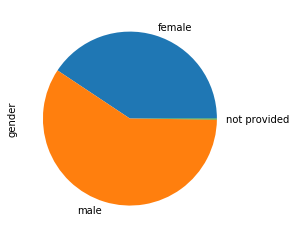

In [132]:
plt.figure()
gender.plot(kind='pie')
plt.show()

- ages

In [141]:
age=pd.cut(data['age'],bins=[13,20,30,40,50,60,70,80,90,100])
age=age.groupby(age).count()
age

age
(13, 20]     24268
(20, 30]     28646
(30, 40]     12491
(40, 50]      8968
(50, 60]      9319
(60, 70]      6855
(70, 80]      2249
(80, 90]       817
(90, 100]     1219
Name: age, dtype: int64

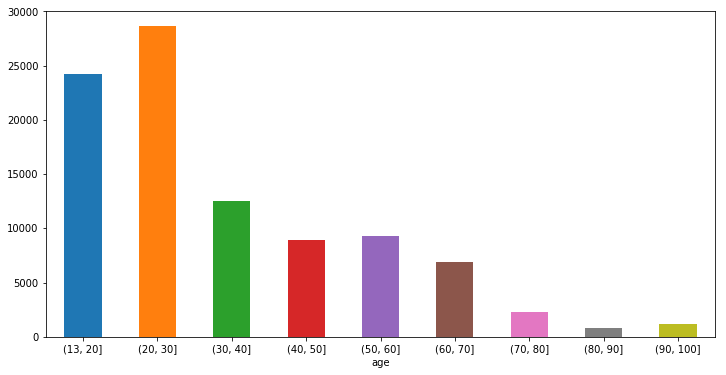

In [149]:
plt.figure(figsize=(12,6))
age.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()


- month

In [152]:
month=data['dob_month'].groupby(data['dob_month']).count()

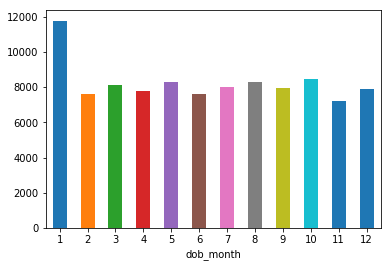

In [157]:
plt.figure()
month.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

- day

In [161]:
day=data['dob_day'].groupby(data['dob_day']).count()

<function matplotlib.pyplot.show(*args, **kw)>

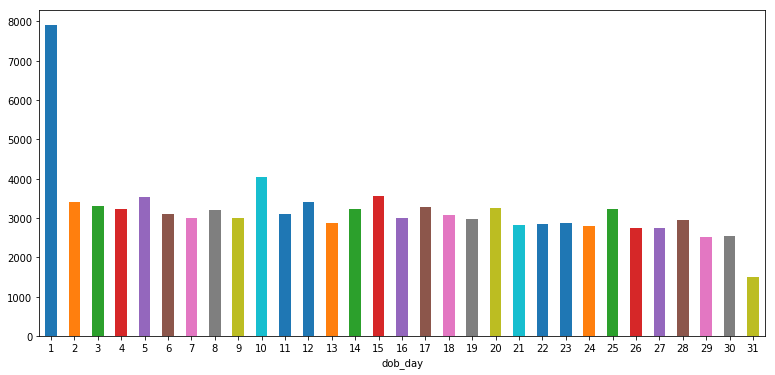

In [164]:
plt.figure(figsize=(13,6))
day.plot(kind='bar')
plt.xticks(rotation=360)
plt.show

- tenure

In [167]:
tenure=pd.cut(data['tenure'],bins=[0,200,400,600,1000,4000])
tenure=tenure.groupby(tenure).count()
tenure

tenure
(0, 200]        21301
(200, 400]      26643
(400, 600]      20833
(600, 1000]     16202
(1000, 4000]    13954
Name: tenure, dtype: int64

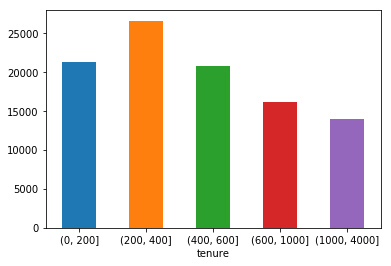

In [169]:
plt.figure()
tenure.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()